# Guided Project: Visualizing Earnings Based On College Majors

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

<li>Rank - Rank by median earnings (the dataset is ordered by this column).
<li>Major_code - Major code.
<li>Major - Major description.
<li>Major_category - Category of major.
<li>Total - Total number of people with major.
<li>Sample_size - Sample size (unweighted) of full-time.
<li>Men - Male graduates.
<li>Women - Female graduates.
<li>ShareWomen - Women as share of total.
<li>Employed - Number employed.
<li>Median - Median salary of full-time, year-round workers.
<li>Low_wage_jobs - Number in low-wage service jobs.
<li>Full_time - Number employed 35 hours or more.
<li>Part_time - Number employed less than 35 hours.

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt

#Display plots in a Jupiter Notebook cell
%matplotlib inline

#Read the dataset into a DataFrame
recent_grads=pd.read_csv("recent-grads.csv")

In [2]:
#Explore DataFrame

#Return the first row formatted as a table
recent_grads.iloc[0]

#Display the head and tail of the dataset
print(recent_grads.head())
print(recent_grads.tail())

#Generate summary statistics for all of the numeric columns
print(recent_grads.describe())



   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  \
0   2057.0    282.0    Engineering    0.120564           36      1976   
1    679.0     77.0    Engineering    0.101852            7       640   
2    725.0    131.0    Engineering    0.153037            3       648   
3   1123.0    135.0    Engineering    0.107313           16       758   
4  21239.0  11021.0    Engineering    0.341631          289     25694   

       ...        Part_time  Full_time_year_round  Unemployed  \
0      ...              270                  

In [3]:
#Display DataFrame dtype
print(recent_grads.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [4]:
#Look up number of rows in DataFrame
raw_data_count=recent_grads.iloc[:,0].size

In [5]:
#Missing values per column
recent_grads.isnull().sum()

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

In [6]:
#Drop rows containing missing values
recent_grads=recent_grads.dropna(axis=0)

#Look up number of rows in DataFrame
cleaned_data_count=recent_grads.iloc[:,0].size

#Compare raw data with cleaned data
print(raw_data_count)
print(cleaned_data_count)

173
172


# Pandas, Scatter Plots

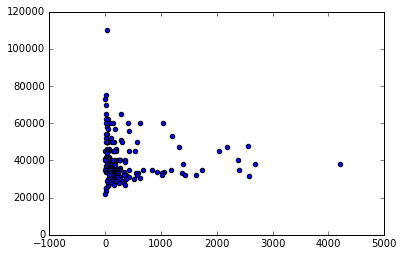

In [7]:
#Explore relation between Sample_size and Median using scatter plots
fig,ax=plt.subplots()
ax.scatter(recent_grads["Sample_size"],recent_grads["Median"])
# or recent_grads.plot(x='Sample_size', y='Median', kind='scatter')

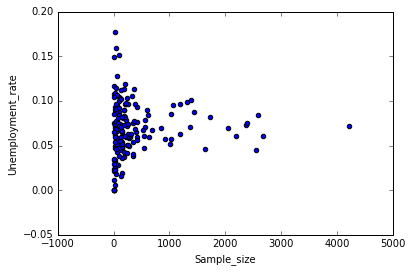

In [8]:
#Explore relation between Sample_size and Unemployment_rate using scatter plots
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

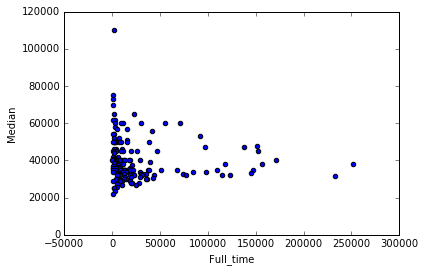

In [9]:
#Explore relation between Full_time and Median using scatter plots
recent_grads.plot(x='Full_time', y='Median', kind='scatter')

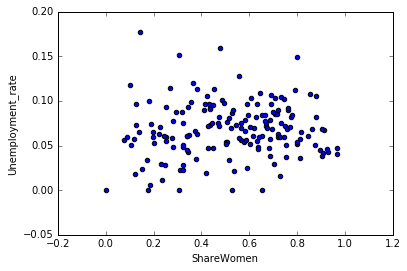

In [10]:
#Explore relation between ShareWomen and Unemployment_rate using scatter plots
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')

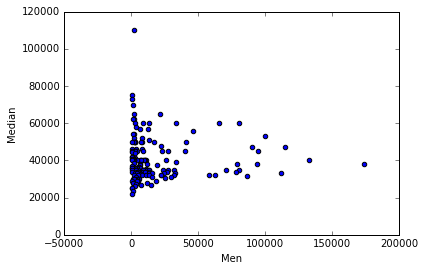

In [11]:
#Explore relation between Men and Median using scatter plots
recent_grads.plot(x='Men', y='Median', kind='scatter')

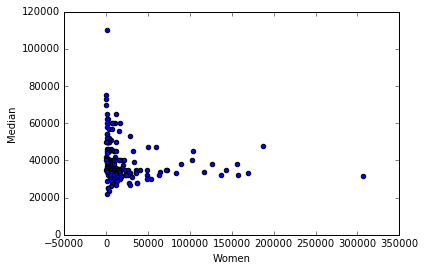

In [12]:
#Explore relation between Women and Median using scatter plots
recent_grads.plot(x='Women', y='Median', kind='scatter')

#### Use the plots to explore the following questions:

Q1 => Do students in more popular majors make more money?
A1 =

Q2 => Do students that majored in subjects that were majority female make more money?
A2 =

Q3 => Is there any link between the number of full-time employees and median salary?
A3 =

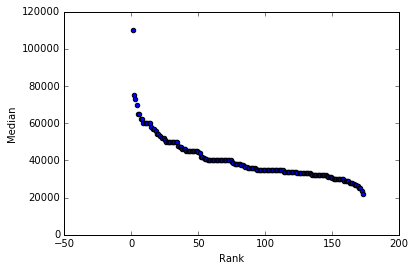

In [13]:
#A1 Popular majors does make more money (correlation is negative and strong)
recent_grads.plot(x='Rank', y='Median', kind='scatter')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f27736bfb00>,
      dtype=object)

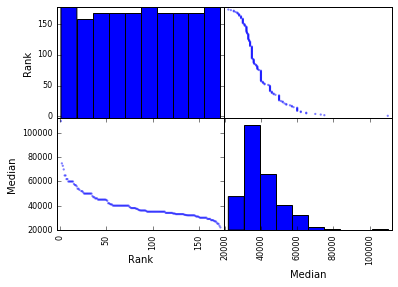

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[["Rank","Median"]])

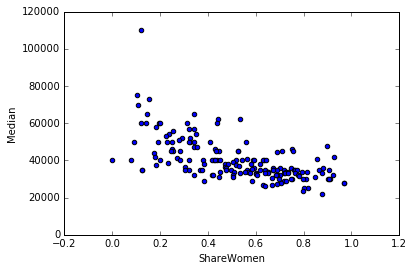

In [15]:
#A2 The more dominant of Women in subjects, the less money the make (correlation is negative and weak)
recent_grads.plot(x='ShareWomen', y='Median', kind='scatter')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f277359a358>,
      dtype=object)

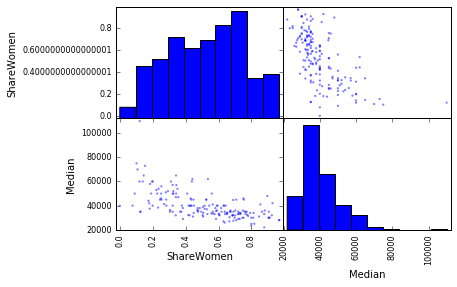

In [16]:
scatter_matrix(recent_grads[["ShareWomen","Median"]])

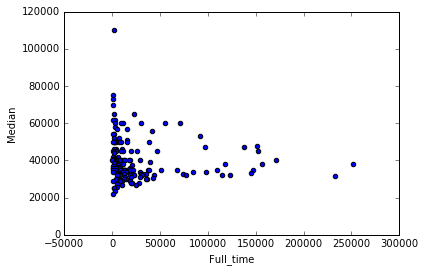

In [17]:
#A3 There os no link between the number of full-time employees and median salary.
recent_grads.plot(x='Full_time', y='Median', kind='scatter')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2773296d30>,
      dtype=object)

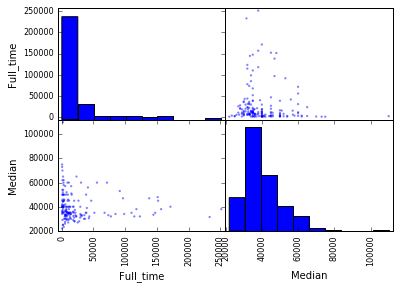

In [18]:
scatter_matrix(recent_grads[["Full_time","Median"]])

# Pandas, Histograms

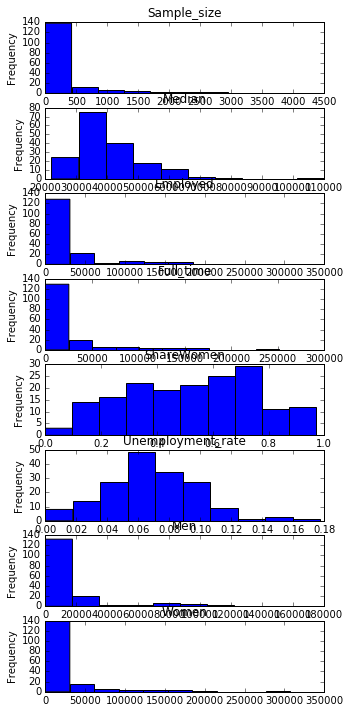

In [19]:
#Generate histograms in separate jupyter notebook cells to explore the distributions of the following columns:
cols=["Sample_size","Median","Employed","Full_time","ShareWomen","Unemployment_rate","Men","Women"]
fig=plt.figure(figsize=(5,12))

for i in range(1,9):
    ax=fig.add_subplot(8,1,i)
    i=i-1
    ax=recent_grads[cols[i]].plot(kind="hist")
    plt.title(cols[i])

#### Use the plots to explore the following questions:
Q1 What percent of majors are predominantly male? Predominantly female?
A1 male=44% and female=56%

Q2 What's the most common median salary range?
A2 Between 30000 and 40000.

In [20]:
#A1 Calculating percent of majors that are predominantly (fe)male

#recent_grads["Major"].value_counts(sort=True)
#recent_grads=recent_grads["ShareWomen"].sort_values(ascending=False)
predominantly_female=recent_grads["ShareWomen"]>=0.5
predominantly_male=recent_grads["ShareWomen"]<0.5
major_female=recent_grads.loc[predominantly_female,"Major"]
major_male=recent_grads.loc[predominantly_male,"Major"]
print("percent of majors that are predominantly male")
print(major_male.size/cleaned_data_count)
print("percent of majors that are predominantly female")
print(major_female.size/cleaned_data_count)

percent of majors that are predominantly male
0.4418604651162791
percent of majors that are predominantly female
0.5581395348837209


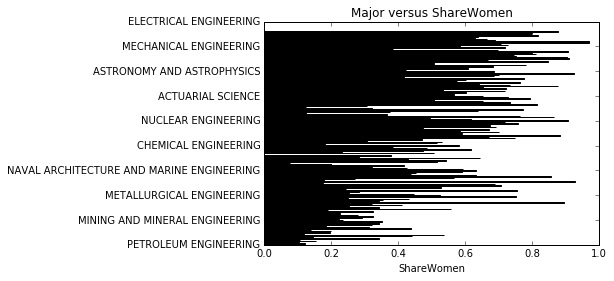

In [21]:
#A1 Major versus ShareWomen
from numpy import arange
num_cols=recent_grads["Major"].unique()

bar_heights = recent_grads["ShareWomen"]
bar_positions = arange(172) + 0.75

fig,ax=plt.subplots()
ax.barh(bar_positions,bar_heights,0.5)
ax.set_yticklabels(recent_grads["Major"])
plt.xlabel("ShareWomen")
plt.title("Major versus ShareWomen")
plt.show()

# Pandas, Scatter Matrix Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2773025a58>,
      dtype=object)

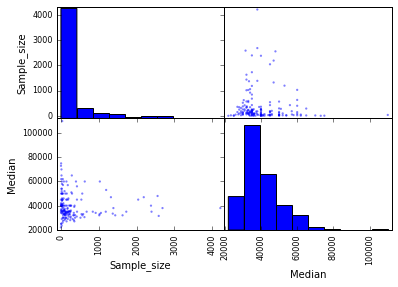

In [22]:
#Import scatter_matrix frm the pandas.plotting module
from pandas.plotting import scatter_matrix

#Create a 2 by 2 scatter matrix plot using the Sample_size and Median columns.
scatter_matrix(recent_grads[["Sample_size","Median"]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f277103af98>,
      dtype=object)

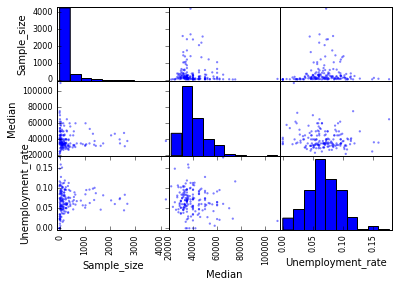

In [23]:
#Create a 3 by 3 scatter matrix plot using the Sample_size, Median, and Unemployment_rate columns.
scatter_matrix(recent_grads[["Sample_size","Median","Unemployment_rate"]])

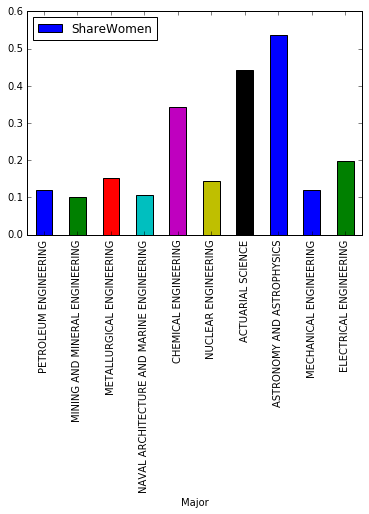

In [24]:
#Share of Women in the top 10 most popular Majors
recent_grads[:10].plot.bar(x="Major",y="ShareWomen")

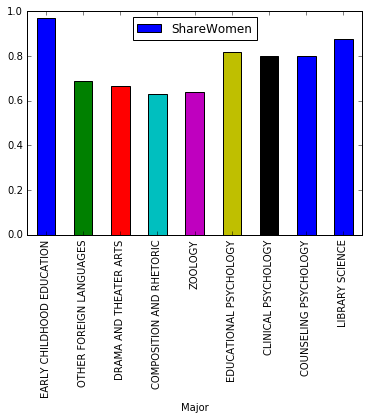

In [25]:
#Share of Women in the top 10 least popular Majors
recent_grads[163:].plot.bar(x="Major",y="ShareWomen")

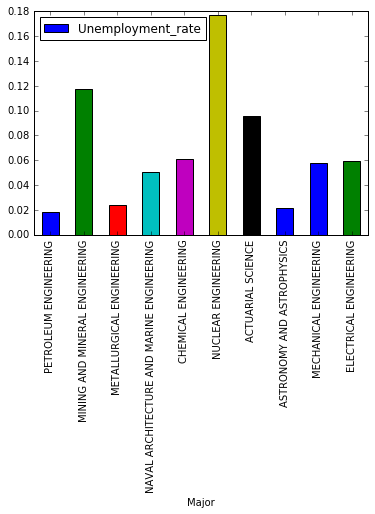

In [26]:
#Unemployment Rate in the top 10 most popular Majors
recent_grads[:10].plot.bar(x="Major",y="Unemployment_rate")

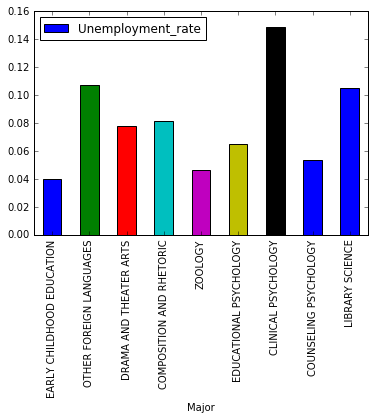

In [27]:
#Unemployment Rate in the top 10 least popular Majors
recent_grads[163:].plot.bar(x="Major",y="Unemployment_rate")